# 0. Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
def prepare_data():
    raw_df = pd.read_csv('data_banknote_authentication.txt')

    global X
    X = raw_df.iloc[:,:4]
    
    global y
    y = raw_df[['class']] # define the target variable (dependent variable) as y

prepare_data()

In [3]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [4]:
X_org = X.copy()

from sklearn.preprocessing import StandardScaler

cols = X.columns

X = StandardScaler().fit_transform(X)

X = pd.DataFrame(data=X,columns=cols)

In [5]:
X.head()

,variance,skewness,curtosis,entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


# 1. Tasks

## 1.1. Clustering on Dataset

### 1.1.1. K-means:

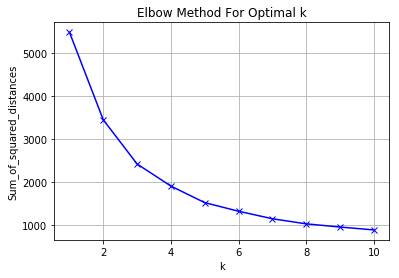

In [6]:
from sklearn.cluster import KMeans

Nc = range(1, 11)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

Sum_of_squared_distances = []
for k in Nc:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(Nc, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

In [7]:
model = KMeans(n_clusters=2, random_state=8)

model.fit(X)

y['cluster'] = model.predict(X)

from sklearn.metrics import accuracy_score
accuracy_score(y['class'], y.cluster)

0.5583090379008746

In [8]:
y.head(10)

,class,cluster
0,0,0
1,0,0
2,0,1
3,0,0
4,0,1
5,0,0
6,0,1
7,0,1
8,0,0
9,0,0


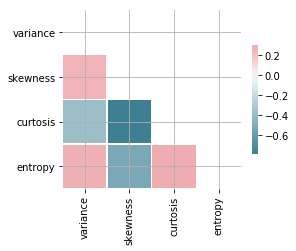

In [9]:
# sns.set(style="white")

# Compute the correlation matrix
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(4, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.grid()

In [10]:
def plot_2f(X,col1,col2,y,col_y):
    markers = ['.', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']

    for i in range(0, y.iloc[:,col_y].unique().shape[0] ):
        X_filtered = X[y.iloc[:,col_y] == i]
        y_filtered = y[y.iloc[:,col_y] == i]
        plt.scatter(X_filtered.iloc[:,col1], X_filtered.iloc[:,col2], 
                    marker=markers[i], label=y.columns[col_y]+"{0}".format(i),
                   s=1)
    plt.xlabel(X_filtered.columns[col1])
    plt.ylabel(X_filtered.columns[col2])
    plt.grid()
    plt.legend()
#     plt.show()

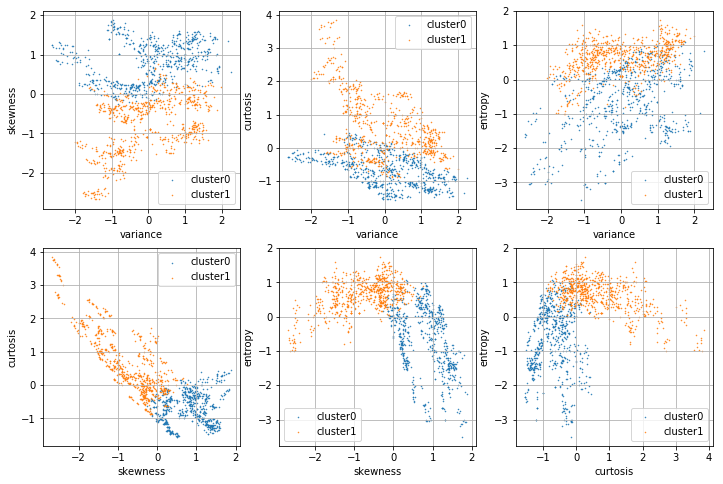

In [11]:
plt.figure(figsize=(12,8))
counter = 1
for i in range(0,4):
    for j in range (i+1,4):
        plt.subplot(2, 3, counter)
        counter += 1
        plot_2f(X, i, j, y, 1)
plt.show()

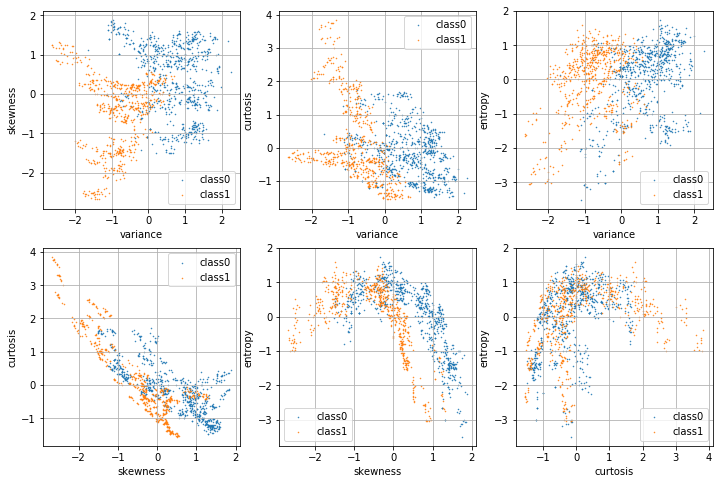

In [12]:
plt.figure(figsize=(12,8))
counter = 1
for i in range(0,4):
    for j in range (i+1,4):
        plt.subplot(2, 3, counter)
        counter += 1
        plot_2f(X, i, j, y, 0)
plt.show()

In [13]:
def plot_3f(X,col1,col2,col3,y,col_y):
    markers = ['.', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']

    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure()
    ax = Axes3D(fig)

    for i in range(0, y.iloc[:,col_y].unique().shape[0] ):
        X_filtered = X[y.iloc[:,col_y] == i]
        y_filtered = y[y.iloc[:,col_y] == i]
        ax.scatter(X_filtered.iloc[:,col1], X_filtered.iloc[:,col2], 
                   X_filtered.iloc[:,col3], marker=markers[i], 
                   label=y.columns[col_y]+"{0}".format(i))

    plt.grid()
    plt.legend()
    plt.xlabel(X_filtered.columns[col1])
    plt.ylabel(X_filtered.columns[col2])

    plt.show()

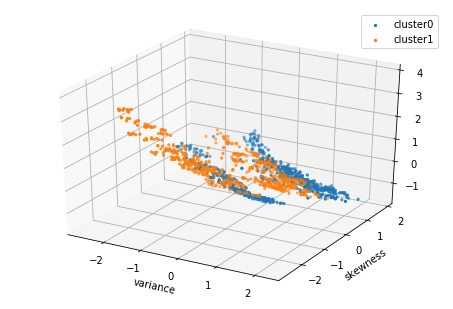

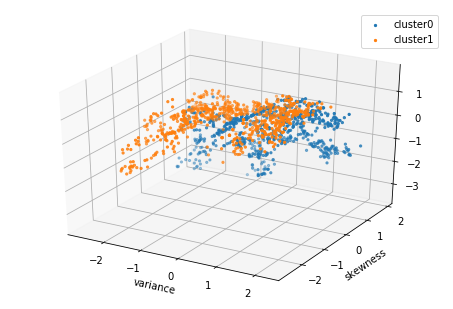

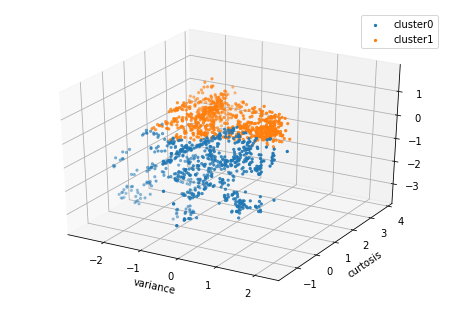

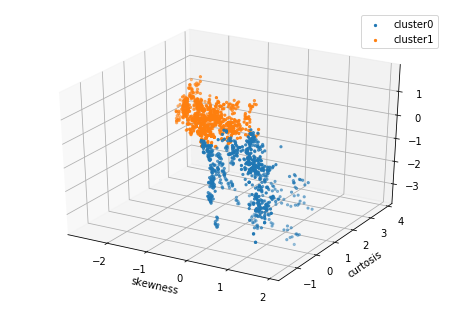

In [14]:
for i in range(0,4):
    for j in range(i+1,4):
        for k in range(j+1,4):
            plot_3f(X,i,j,k,y,1)

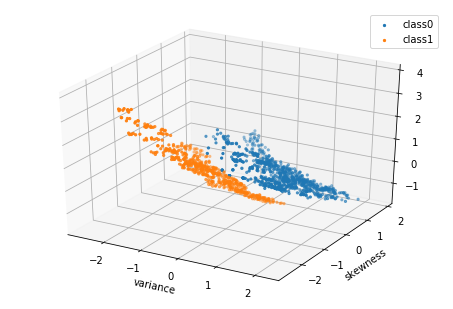

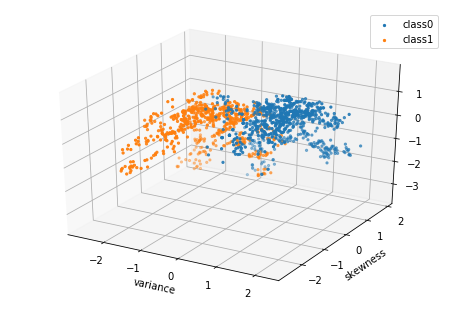

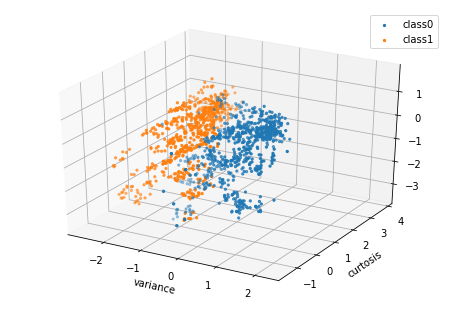

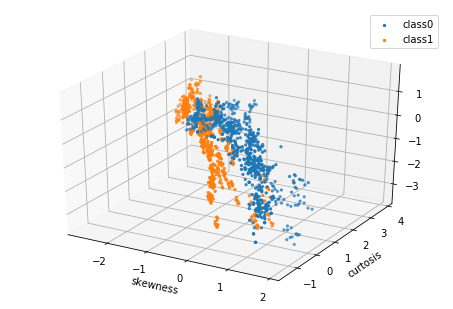

In [15]:
for i in range(0,4):
    for j in range(i+1,4):
        for k in range(j+1,4):
            plot_3f(X,i,j,k,y,0)

### 1.1.2. Expectation Maximization

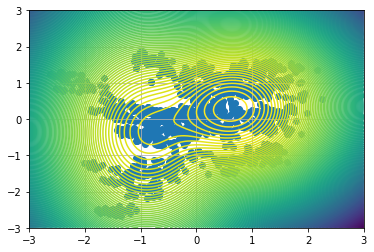

In [16]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit(X.iloc[:,[0,1]])

xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
xxx = np.array([xx.ravel(), yy.ravel()]).T
zz = gmm.score_samples(xxx)
zz = zz.reshape((100,100))
 
plt.contour(xx, yy, zz, 180)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1])
plt.grid()
plt.show()

In [17]:
gmm.fit(X)
y['exp_max'] = gmm.predict(X)

accuracy_score(y['class'], y.exp_max)

0.532069970845481

In [18]:
y.head()

,class,cluster,exp_max
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0


## 1.2. Dimensionality Reduction on Dataset

### 1.2.1. Random Forest

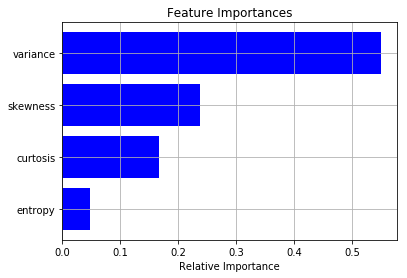

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X, y['class'])
rf.feature_importances_

features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

# plt.figure(figsize=(5,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid()
plt.show()

In [20]:
rf_selected_features = [features[i] for i in indices[-2:]]
rf_selected_features

['skewness', 'variance']

### 1.2.2. PCA

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

In [22]:
finalDF_PCA = principalDf

finalDf = pd.concat([principalDf, y['class']], axis = 1)

In [23]:
pca.explained_variance_ratio_

array([0.54497602, 0.32328872])

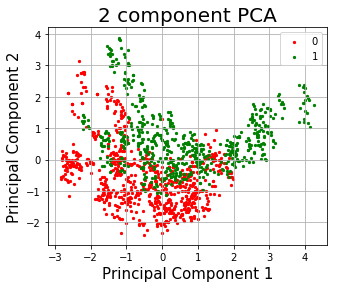

In [24]:
fig = plt.figure(figsize = (5,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

In [25]:
from sklearn.decomposition import FastICA
pca = FastICA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['i component 1', 'i component 2'])

In [26]:
finalDF_ICA = principalDf

finalDf = pd.concat([principalDf, y['class']], axis = 1)

In [27]:
pca.components_

array([[ 0.01341442, -0.00674986,  0.00228956,  0.01668065],
       [ 0.01271542,  0.00961927, -0.01155645,  0.00110911]])

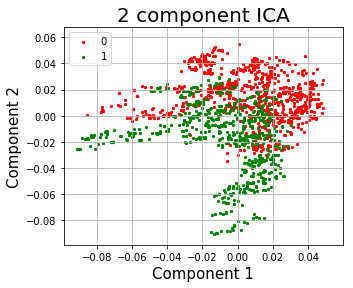

In [28]:
fig = plt.figure(figsize = (5,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 component ICA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'i component 1']
               , finalDf.loc[indicesToKeep, 'i component 2']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

### 1.2.3. Randomized Projections

In [29]:
from sklearn import random_projection

transformer = random_projection.GaussianRandomProjection(n_components=2)
principalComponents = transformer.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['random projection component 1', 'random projection component 2'])

In [30]:
finalDF_RP = principalDf

finalDf = pd.concat([principalDf, y['class']], axis = 1)

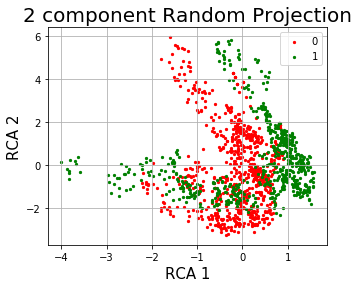

In [31]:
fig = plt.figure(figsize = (5,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('RCA 1', fontsize = 15)
ax.set_ylabel('RCA 2', fontsize = 15)
ax.set_title('2 component Random Projection', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'random projection component 1']
               , finalDf.loc[indicesToKeep, 'random projection component 2']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

## 1.3. Clustering after Dim Reduction

### 1.3.1. K-means:

#### 1.3.1.1. Random Forest

In [32]:
X.head()

,variance,skewness,curtosis,entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


In [33]:
X_rf_selected = X[rf_selected_features]

X_rf_selected.head()

,skewness,variance
0,1.149455,1.121806
1,1.064453,1.447066
2,-0.777352,1.207810
3,1.295478,1.063742
4,-1.087038,-0.036772


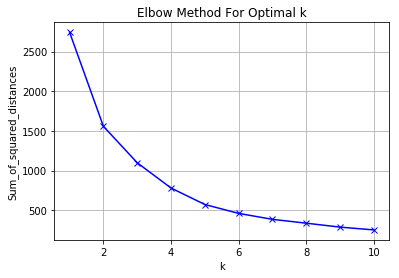

In [34]:
from sklearn.cluster import KMeans

Nc = range(1, 11)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

Sum_of_squared_distances = []
for k in Nc:
    km = KMeans(n_clusters=k)
    km = km.fit(X_rf_selected)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(Nc, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

In [35]:
model = KMeans(n_clusters=2, random_state=6)

model.fit(X_rf_selected)

y['cluster'] = model.predict(X_rf_selected)

In [36]:
accuracy_score(y['class'], y.cluster)

0.8782798833819242

In [37]:
y.head()

,class,cluster,exp_max
0,0,0,1
1,0,0,1
2,0,0,0
3,0,0,1
4,0,1,0


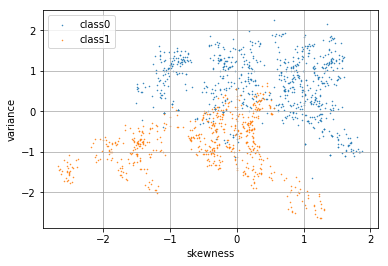

In [38]:
plot_2f(X_rf_selected, 0, 1, y, 0)
plt.show()

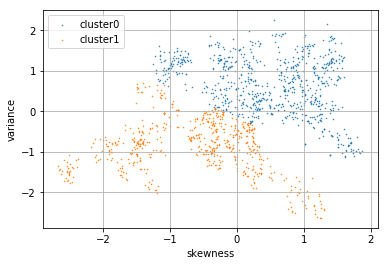

In [39]:
plot_2f(X_rf_selected, 0, 1, y, 1)
plt.show()

#### 1.3.1.2. PCA

In [40]:
finalDF_PCA.head()

,principal component 1,principal component 2
0,-1.472805,-1.163917
1,-1.639441,-1.093812
2,0.513919,-1.324880
3,-2.310952,-0.202514
4,1.193416,0.024654


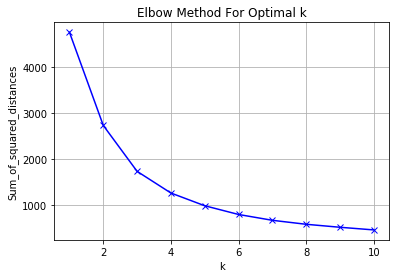

In [41]:
from sklearn.cluster import KMeans

Nc = range(1, 11)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

Sum_of_squared_distances = []
for k in Nc:
    km = KMeans(n_clusters=k)
    km = km.fit(finalDF_PCA)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(Nc, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

In [42]:
model = KMeans(n_clusters=2, random_state=5)

model.fit(finalDF_PCA)

y['cluster'] = model.predict(finalDF_PCA)

accuracy_score(y['class'], y.cluster)

0.5583090379008746

In [43]:
y.head()

,class,cluster,exp_max
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0


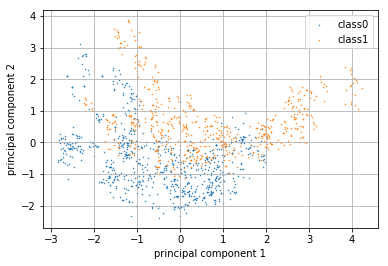

In [44]:
plot_2f(finalDF_PCA, 0, 1, y, 0)
plt.show()

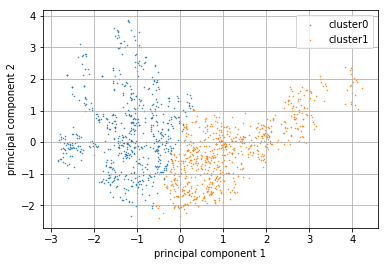

In [45]:
plot_2f(finalDF_PCA, 0, 1, y, 1)
plt.show()

#### 1.3.1.3. ICA

In [46]:
finalDF_ICA.head()

,i component 1,i component 2
0,0.010969,0.036993
1,0.008029,0.038840
2,0.032039,0.007153
3,-0.016432,0.039227
4,0.010142,-0.019331


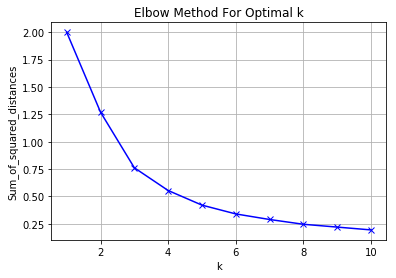

In [47]:
from sklearn.cluster import KMeans

Nc = range(1, 11)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

Sum_of_squared_distances = []
for k in Nc:
    km = KMeans(n_clusters=k)
    km = km.fit(finalDF_ICA)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(Nc, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

In [48]:
model = KMeans(n_clusters=2, random_state=5)

model.fit(finalDF_ICA)

y['cluster'] = model.predict(finalDF_ICA)

accuracy_score(y['class'], y.cluster)

0.5080174927113703

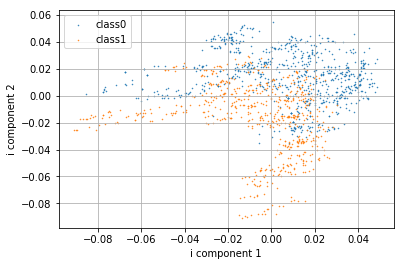

In [49]:
plot_2f(finalDF_ICA, 0, 1, y, 0)
plt.show()

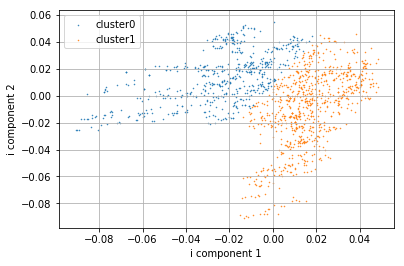

In [50]:
plot_2f(finalDF_ICA, 0, 1, y, 1)
plt.show()

#### 1.3.1.4. Random Projection

In [51]:
finalDF_RP.head()

,random projection component 1,random projection component 2
0,0.666424,-0.210509
1,0.189825,-0.100678
2,-0.155700,-2.340102
3,0.211713,1.326212
4,-0.602350,-1.063178


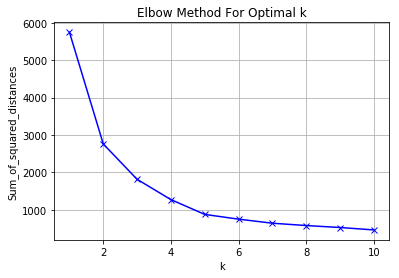

In [52]:
from sklearn.cluster import KMeans

Nc = range(1, 11)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

Sum_of_squared_distances = []
for k in Nc:
    km = KMeans(n_clusters=k)
    km = km.fit(finalDF_RP)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(Nc, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

In [53]:
model = KMeans(n_clusters=2, random_state=7)

model.fit(finalDF_RP)

y['cluster'] = model.predict(finalDF_RP)

accuracy_score(y['class'], y.cluster)

0.5189504373177842

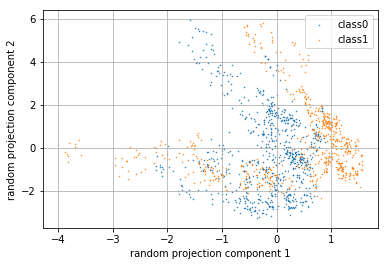

In [54]:
plot_2f(finalDF_RP, 0, 1, y, 0)
plt.show()

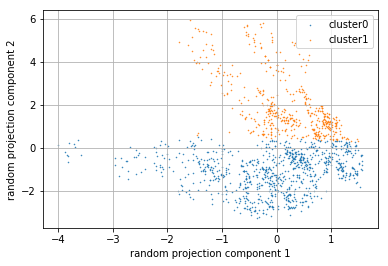

In [55]:
plot_2f(finalDF_RP, 0, 1, y, 1)
plt.show()

### 1.3.2. Expectation Maximization

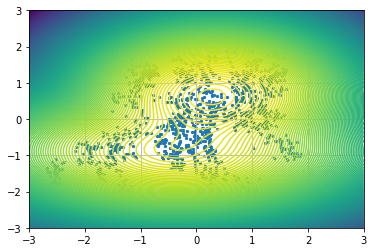

In [56]:
# RF:

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit(X_rf_selected)

xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
xxx = np.array([xx.ravel(), yy.ravel()]).T
zz = gmm.score_samples(xxx)
zz = zz.reshape((50,50))
 
plt.contour(xx, yy, zz, 200)
plt.scatter(X_rf_selected.iloc[:, 0], X_rf_selected.iloc[:, 1],s=5)
plt.grid()
plt.show()

In [57]:
y['exp_max'] = gmm.predict(X_rf_selected)

accuracy_score(y['class'], y.exp_max)

0.15597667638483964

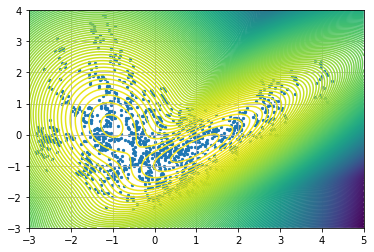

In [58]:
# PCA:

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit(finalDF_PCA)

xx, yy = np.meshgrid(np.linspace(-3, 5, 100), np.linspace(-3, 4, 100))
xxx = np.array([xx.ravel(), yy.ravel()]).T
zz = gmm.score_samples(xxx)
zz = zz.reshape((100,100))
 
plt.contour(xx, yy, zz, 200)
plt.scatter(finalDF_PCA.iloc[:, 0], finalDF_PCA.iloc[:, 1],s=5)
plt.grid()
plt.show()

In [59]:
y['exp_max'] = gmm.predict(finalDF_PCA)

accuracy_score(y['class'], y.exp_max)

0.5342565597667639

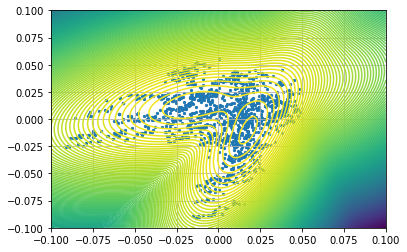

In [60]:
# ICA:

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit(finalDF_ICA)

xx, yy = np.meshgrid(np.linspace(-.1, .1, 100), np.linspace(-.1, .1, 100))
xxx = np.array([xx.ravel(), yy.ravel()]).T
zz = gmm.score_samples(xxx)
zz = zz.reshape((100,100))
 
plt.contour(xx, yy, zz, 200)
plt.scatter(finalDF_ICA.iloc[:, 0], finalDF_ICA.iloc[:, 1],s=5)
plt.grid()
plt.show()

In [61]:
y['exp_max'] = gmm.predict(finalDF_ICA)

accuracy_score(y['class'], y.exp_max)

0.46574344023323616

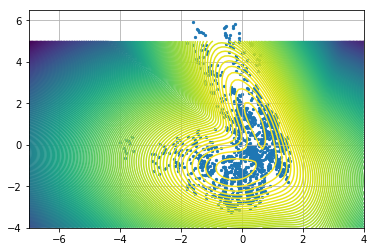

In [62]:
# RCA:

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit(finalDF_RP)

xx, yy = np.meshgrid(np.linspace(-7, 4, 100), np.linspace(-4, 5, 100))
xxx = np.array([xx.ravel(), yy.ravel()]).T
zz = gmm.score_samples(xxx)
zz = zz.reshape((100,100))
 
plt.contour(xx, yy, zz, 200)
plt.scatter(finalDF_RP.iloc[:, 0], finalDF_RP.iloc[:, 1],s=5)
plt.grid()
plt.show()

In [63]:
y['exp_max'] = gmm.predict(finalDF_RP)

accuracy_score(y['class'], y.exp_max)

0.3965014577259475

## 1.2.4 Neural Network on Dim Reduction

### 1.2.4.1. Random Forest

In [160]:
X_rf_selected.head()

,skewness,variance
0,1.149455,1.121806
1,1.064453,1.447066
2,-0.777352,1.207810
3,1.295478,1.063742
4,-1.087038,-0.036772


In [165]:
from sklearn.cross_validation import train_test_split

X_rf_sel_train, X_rf_sel_test, y_rf_sel_train, y_rf_sel_test = train_test_split(X_rf_selected, y['class'], test_size=0.3)

In [166]:
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier

# Spot Check Algorithms
models = []
models.append(('RF', MLPClassifier(activation='tanh',max_iter=1000)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_rf_sel_train, y_rf_sel_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

RF: 0.871875 (0.029847)


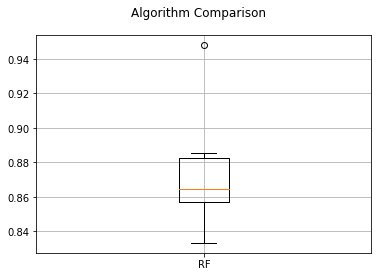

In [167]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.show()

In [173]:
model = MLPClassifier(activation='tanh',max_iter=1000)

model.fit(X_rf_sel_train, y_rf_sel_train)

print(model.score(X_rf_sel_train, y_rf_sel_train))
print(model.score(X_rf_sel_test, y_rf_sel_test))

0.875
0.8956310679611651


### 1.2.4.2. PCA

In [174]:
finalDF_PCA.head()

,principal component 1,principal component 2
0,-1.472805,-1.163917
1,-1.639441,-1.093812
2,0.513919,-1.324880
3,-2.310952,-0.202514
4,1.193416,0.024654


In [175]:
from sklearn.cross_validation import train_test_split

X_rf_sel_train, X_rf_sel_test, y_rf_sel_train, y_rf_sel_test = train_test_split(finalDF_PCA, y['class'], test_size=0.3)

In [176]:
# Spot Check Algorithms
models = []
models.append(('PCA', MLPClassifier(activation='tanh',max_iter=1000)))
# evaluate each model in turn
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_rf_sel_train, y_rf_sel_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

PCA: 0.784375 (0.047060)


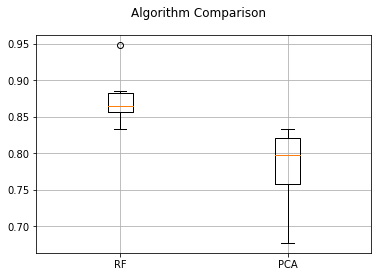

In [177]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.show()

In [178]:
model = MLPClassifier(activation='tanh',max_iter=1000)

model.fit(X_rf_sel_train, y_rf_sel_train)

print(model.score(X_rf_sel_train, y_rf_sel_train))
print(model.score(X_rf_sel_test, y_rf_sel_test))

0.7770833333333333
0.7305825242718447


### 1.2.4.3. ICA

In [75]:
finalDF_ICA.head()

,i component 1,i component 2
0,0.010969,0.036993
1,0.008029,0.038840
2,0.032039,0.007153
3,-0.016432,0.039227
4,0.010142,-0.019331


In [76]:
from sklearn.cross_validation import train_test_split

X_rf_sel_train, X_rf_sel_test, y_rf_sel_train, y_rf_sel_test = train_test_split(finalDF_ICA, y['class'], test_size=0.3)

In [77]:
# Spot Check Algorithms
models = []
models.append(('ICA', MLPClassifier(activation='tanh',max_iter=1000)))
# evaluate each model in turn
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_rf_sel_train, y_rf_sel_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ICA: 0.754083 (0.036189)


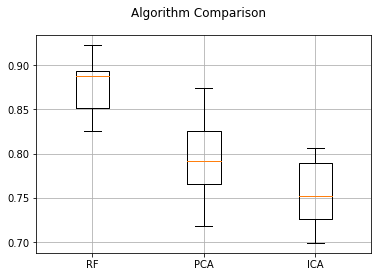

In [78]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.show()

In [79]:
model = MLPClassifier(activation='tanh',max_iter=1000)

model.fit(X_rf_sel_train, y_rf_sel_train)

print(model.score(X_rf_sel_train, y_rf_sel_train))
print(model.score(X_rf_sel_test, y_rf_sel_test))

0.7551020408163265

### 1.2.4.3. Random Projection

In [80]:
finalDF_RP.head()

,random projection component 1,random projection component 2
0,0.666424,-0.210509
1,0.189825,-0.100678
2,-0.155700,-2.340102
3,0.211713,1.326212
4,-0.602350,-1.063178


In [81]:
from sklearn.cross_validation import train_test_split

X_rf_sel_train, X_rf_sel_test, y_rf_sel_train, y_rf_sel_test = train_test_split(finalDF_RP, y['class'], test_size=0.3)

In [82]:
# Spot Check Algorithms
models = []
models.append(('RCA', MLPClassifier(activation='tanh',max_iter=1000)))
# evaluate each model in turn
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_rf_sel_train, y_rf_sel_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

RCA: 0.831829 (0.039577)


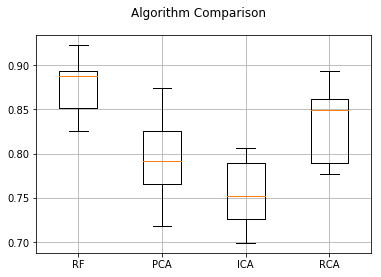

In [83]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.show()

In [84]:
model = MLPClassifier(activation='tanh',max_iter=1000)

model.fit(X_rf_sel_train, y_rf_sel_train)

print(model.score(X_rf_sel_train, y_rf_sel_train))
print(model.score(X_rf_sel_test, y_rf_sel_test))

0.8104956268221575

## 1.2.5. Apply Neural Network on New Data

### 1.2.5.1. K-means:

In [85]:
y.head()

,class,cluster,exp_max
0,0,0,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1


In [86]:
model = KMeans(n_clusters=2)
model.fit(X)
y['cluster'] = model.predict(X)

accuracy_score(y['class'], y.cluster)

0.5583090379008746

In [87]:
from sklearn.cross_validation import train_test_split

X_rf_sel_train, X_rf_sel_test, y_rf_sel_train, y_rf_sel_test = train_test_split(y.cluster.values.reshape(-1,1), y['class'])

In [88]:
# Spot Check Algorithms
models = []
models.append(('K-Means', MLPClassifier(activation='tanh',max_iter=1000)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_rf_sel_train, y_rf_sel_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

K-Means: 0.559747 (0.030986)


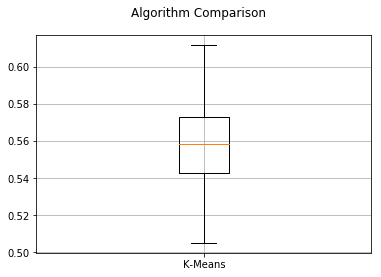

In [89]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.show()

### 1.2.5.2. Expectation Maximization:

In [90]:
y.head()

,class,cluster,exp_max
0,0,0,0
1,0,0,1
2,0,1,1
3,0,0,0
4,0,1,1


In [91]:
model = GaussianMixture(n_components=2, random_state=7)
model.fit(X)
y['exp_max'] = model.predict(X)

accuracy_score(y['class'], y.exp_max)

0.532798833819242

In [92]:
from sklearn.cross_validation import train_test_split

X_rf_sel_train, X_rf_sel_test, y_rf_sel_train, y_rf_sel_test = train_test_split(y.exp_max.values.reshape(-1,1), y['class'])

In [93]:
# Spot Check Algorithms
models = []
models.append(('ExpMax', MLPClassifier(activation='tanh',max_iter=1000)))
# evaluate each model in turn
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_rf_sel_train, y_rf_sel_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ExpMax: 0.552989 (0.027739)


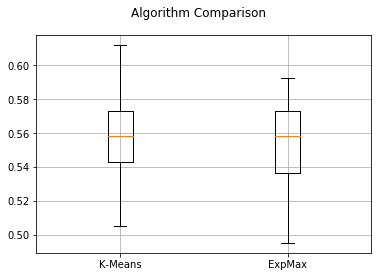

In [94]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.show()

In [95]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y['class'])